In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 6]

---

# 4. Part 4 (Session 4): Algorithm Design Choices:

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#4.-Part-4-(Session-4):-Algorithm-Design-Choices:" data-toc-modified-id="4.-Part-4-(Session-4):-Algorithm-Design-Choices:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>4. Part 4 (Session 4): Algorithm Design Choices:</a></div><div class="lev2 toc-item"><a href="#4.1-Searching-an-ordered-list" data-toc-modified-id="4.1-Searching-an-ordered-list-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>4.1 Searching an ordered list</a></div><div class="lev3 toc-item"><a href="#Linear-search" data-toc-modified-id="Linear-search-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Linear search</a></div><div class="lev3 toc-item"><a href="#Binary-search" data-toc-modified-id="Binary-search-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Binary search</a></div><div class="lev3 toc-item"><a href="#Comparison-of-binary-and-linear-search" data-toc-modified-id="Comparison-of-binary-and-linear-search-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Comparison of binary and linear search</a></div><div class="lev2 toc-item"><a href="#4.1b-Computational-complexity-of-linear-search" data-toc-modified-id="4.1b-Computational-complexity-of-linear-search-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>4.1b Computational complexity of linear search</a></div><div class="lev2 toc-item"><a href="#4.1c-Scaling-of-binary-search-with-list-size" data-toc-modified-id="4.1c-Scaling-of-binary-search-with-list-size-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>4.1c Scaling of binary search with list size</a></div><div class="lev2 toc-item"><a href="#4.1d-What-are-the-pros-and-cons-of-the-binary-and-linear-search-algorithms?" data-toc-modified-id="4.1d-What-are-the-pros-and-cons-of-the-binary-and-linear-search-algorithms?-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4.1d What are the pros and cons of the binary and linear search algorithms?</a></div><div class="lev1 toc-item"><a href="#4.2-Ordering-Lists" data-toc-modified-id="4.2-Ordering-Lists-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>4.2 Ordering Lists</a></div><div class="lev2 toc-item"><a href="#How-do-you-sort-a-list?" data-toc-modified-id="How-do-you-sort-a-list?-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>How do you sort a list?</a></div><div class="lev3 toc-item"><a href="#ASIDE:-Some-useful-code-for-swapping-2-elements..." data-toc-modified-id="ASIDE:-Some-useful-code-for-swapping-2-elements...-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>ASIDE: Some useful code for swapping 2 elements...</a></div><div class="lev2 toc-item"><a href="#4.2a-Sorting-Algorithms:-Selection-Sort" data-toc-modified-id="4.2a-Sorting-Algorithms:-Selection-Sort-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>4.2a Sorting Algorithms: <em>Selection Sort</em></a></div><div class="lev3 toc-item"><a href="#5.2d-Questions-on-selection-sort" data-toc-modified-id="5.2d-Questions-on-selection-sort-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>5.2d Questions on selection sort</a></div><div class="lev2 toc-item"><a href="#4.2c-EXERCISE:-Research-some-other-sorting-algorthms" data-toc-modified-id="4.2c-EXERCISE:-Research-some-other-sorting-algorthms-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>4.2c EXERCISE: Research some other sorting algorthms</a></div><div class="lev1 toc-item"><a href="#4.3.-Algorithm-Design-Choices:-Calculating-the-standard-deviation" data-toc-modified-id="4.3.-Algorithm-Design-Choices:-Calculating-the-standard-deviation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>4.3. Algorithm Design Choices: Calculating the standard deviation</a></div>

## 4.1 Searching an ordered list

An ordered list is a list where the numbers are in size order.

- An example of an ordered list is:

In [5]:
a=[-1, 3, 12, 25, 74, 1000, 2056]
print(a)

[-1, 3, 12, 25, 74, 1000, 2056]


Let's look at two ways to search this list:

### Linear search

In the linear search you start at one end of the list and keep looking at the next number until you find the answer. Then you return the corresponding index.

Easy! But not efficient.

In [6]:
def linearSearch(a, ans):
    """ Function that performs a linear search
    """
    i=0
    while a[i] != ans:
        i += 1
    else:
        return i
    

### Binary search

In a binary search you exploit that the list is ordered.
1. Look at the middle value of the ordered list
2. Is it the right answer?
    1. If true, return the index and EXIT the search
    2. If not, throw away the half of the list that does not contain the correct answer
3. Goto step 1

In [7]:
def binary_search(items, desired_item, start=0, end=None):
    """ Function that performs a binary search
    """
    if end == None:
        end = len(items)

    if start == end:
        raise ValueError("%s was not found in the list." % desired_item)

    pos = (end - start) // 2 + start

    if desired_item == items[pos]:
        return pos
    elif desired_item > items[pos]:
        return binary_search(items, desired_item, start=(pos + 1), end=end)
    else: # desired_item < items[pos]:
        return binary_search(items, desired_item, start=start, end=pos)
    

### Comparison of binary and linear search

Let's do a very quick comparison before we explore the full computational complexity.

In [8]:
# Create an arbitary, ordered list of numbers
a = range(10000)

# Define a target number
find = 500.

print("Linear Search:")
%timeit linearSearch(a, find)

print("")
print("Binary Search:")
%timeit binary_search(a, find)

Linear Search:
68.5 µs ± 910 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Binary Search:
7.34 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 4.1b Computational complexity of linear search

- First we need to create an array of different list sizes
- Let's now add a loop over these different list sizes

[        1        10       100      1000     10000    100000   1000000
  10000000 100000000]
325 ns ± 5.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.03 µs ± 9.64 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
7.93 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
81.6 µs ± 2.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
872 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.88 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
88.8 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
872 ms ± 4.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.05 s ± 260 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[3.18102248e-07 1.01403996e-06 7.83961336e-06 7.90567397e-05
 8.61404141e-04 8.73526874e-03 8.69006300e-02 8.67360447e-01
 8.71407347e+00]


Text(0,0.5,'Time [s]')

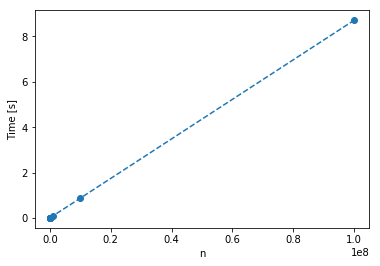

In [9]:
power = np.arange(0,9)
n = 10**power

print(n)

time= np.arange(len(n), dtype="float")
i=0

for length in n:
    a = range(length)
    find = length//3
    d = %timeit -o linearSearch(a, find)
    time[i] = d.best
    i += 1
    
print(time)

plt.plot( n,time, '--o')
plt.xlabel("n")
plt.ylabel("Time [s]")

**Question 4.2a:** What is the computational complexity of the linear search according to this graph?

## 4.1c Scaling of binary search with list size

- **EXERCISE** Determine the computational complexity of the binary search algorithm

In [10]:
### ANSWER

time2= np.arange(len(n), dtype="float")
i=0

for length in n:
    a = range(length)
    find = length//3
    d = %timeit -o binary_search(a, find)
    time2[i] = d.best
    i += 1
    
print( d.best )

495 ns ± 34.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.53 µs ± 42.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.6 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.18 µs ± 301 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.2 µs ± 534 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.4 µs ± 79.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
15.1 µs ± 460 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.9 µs ± 217 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
19.4 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.9199201799999627e-05


Text(0,0.5,'Time [micro s]')

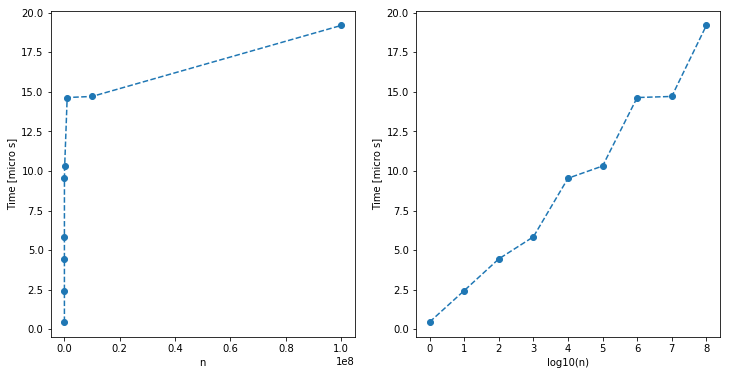

In [30]:
### ANSWER

plt.subplot(1,2,1)
plt.plot( n, time2*1e6, '--o' )
plt.xlabel("n")
plt.ylabel("Time [micro s]")

plt.subplot(1,2,2)
plt.plot( np.log10(n), time2*1e6, '--o' )
plt.xlabel("log10(n)")
plt.ylabel("Time [micro s]")

---

## 4.1d What are the pros and cons of the binary and linear search algorithms?

**QUESTION 4.4a:** 

- For each algorithm how does the,
    - best possible time scale?
    - average time scale
    - the worst time scale
- The Binary Search is much more efficient than the Linear Search
    - Might we ever choose to use a linear search?

In [ ]:
# YOUR CODE HERE




---

# 4.2 Ordering Lists

The classic problem is:

**Given a list of values and a function that compares two values, order the values in the list from smallest to largest.**

## How do you sort a list?

- Take 10 post-it notes and write different numbers on them
- Place them in a random order in front of you
- Now, start ordering the numbers
- As you do so think about the process you are doing to order them
- Using this experience, write down a list of instructions so that someone else could learn how to order a list if they did not know how to do it already
- There is no CORRECT answer here - I just want you to describe how you do it

### ASIDE: Some useful code for swapping 2 elements...

In [36]:
a=np.array([1,2,3,4,5,6,8])

a[0], a[2]= a[2], a[0]
print(a)

[3 2 1 4 5 6 8]


## 4.2a Sorting Algorithms: _Selection Sort_

The selection sort algorithm is quite simple.

You recursively find the minimum (or maximum) value in a list and move it to the end of the list. You need to make sure that the new range you search for the minimum value does not contain the values you have already sorted.

**EXERCISE 5.2a: Write pseudocode to describe the selection sort algorithm**

_WRITE YOUR PSEUDOCODE HERE:_



**EXERCISE 5.2b: Implement the selection sort algorithm as a function in python**

In [ ]:
def selection_sort(items):
    """Sorts a list of items into ascending order using the
       selection sort algoright.
       """
    for step in range(len(items)):
        # Find the location of the smallest element in
        # items[step:].
        location_of_smallest = step
        for location in range(step, len(items)):
            # TODO: determine location of smallest
            ...
        # TODO: Exchange items[step] with items[location_of_smallest]
        ...
    return items

In [1]:
### SOLUTION 

def selection_sort(items):
    """Sorts a list of items into ascending order using the
       selection sort algoright.
       """
    for step in range(len(items)):
        # Find the location of the smallest element in
        # items[step:].
        location_of_smallest = step
        for location in range(step, len(items)):
            # TODO: determine location of smallest
            if(items[location]<items[location_of_smallest]):
                location_of_smallest = location
                
        # TODO: Exchange items[step] with items[location_of_smallest]
        items[step], items[location_of_smallest] = items[location_of_smallest], items[step]
    return items

**EXERCISE 5.2c:**  Test your function on the data below

In [4]:
a = np.random.randint(0,1000, 100)
selection_sort(a)     
print(a)

[  2  20  35  39  65  78  82  83  89 100 122 129 153 158 172 205 216 225
 235 239 240 243 252 272 274 275 283 286 286 293 313 336 346 349 357 365
 376 386 388 390 392 394 403 405 408 413 432 444 445 462 465 480 488 500
 507 509 514 514 523 536 551 552 563 576 577 583 588 591 605 607 646 660
 679 684 691 704 712 746 777 787 788 794 796 807 834 840 865 879 887 922
 926 928 939 941 941 945 970 983 999 999]


### 5.2d Questions on selection sort

- By inspecting the algorithm above, what is the computational complexity of the selection sort algorithm?
- How many comparisons are make?
- What is the performance if the list is already ordered?
- What is the best performance?
- What is the worst performance?



## 4.2c EXERCISE: Research some other sorting algorthms

Merge Sort has a computational complexity of $\mathcal{O}(n \log(n))$ - research it to understand how it works

- Find some code on the web to implement the algorithm
- Show that the computational complexity is $\mathcal{O}(n \log(n))$
- There are video linked off this weeks learn page to help you.
- Choose another algorithm from below and understand that also.

In [34]:
### Explore the computational complexity of merge sort here

<img src="https://i.imgur.com/fq0A8hx.gif">

https://www.youtube.com/watch?v=ZZuD6iUe3Pc

<img src="http://professorjava.weebly.com/uploads/5/3/6/1/5361705/1828852.jpg?744">

---

# 4.3. Algorithm Design Choices: Calculating the standard deviation

The standard equation for calculating the standard deviation, $\sigma$ is:

$$  \sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \left( x_i - \mu \right) ^2 } $$

Where there are $N$ measurements of $x_i$ and $\mu$ is the mean of these measurements.

$$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$$

**Question 5a** Use either a flowchart or pseudocode to design a function that estimates the value of $\sigma$ using the equation described above where the input is a 1d array, `X` of discrete observations $x_i$. Design this algorithm using loops that iterate over the values of $x_i$.

We can rearrange the equation for the standard deviation:

Let's start by expanding the term inside the square root:

$$\frac{1}{N} \sum_{i=1}^{N} \left( x_i - \mu \right) ^2 = \frac{1}{N} \sum_{i=1}^{N} x_i^2 - \frac{2 \mu}{N} \sum_{i=1}^{N} x_i + \frac{1}{N} \sum_{i=1}^{N} \mu^2$$

$$= \frac{1}{N} \sum_{i=1}^{N} x_i^2 - 2 \mu^2 + \frac{1}{N}N\mu^2$$

$$= \frac{1}{N} \sum_{i=1}^{N} x_i^2 - \mu^2$$

$$= \frac{1}{N} \sum_{i=1}^{N} x_i^2 -  \frac{1}{N^2} \left( \sum_{i=1}^{N} x_i \right) ^2$$

So, substituting this back in:

$$  \sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \left( x_i - \mu \right) ^2 } \ equiv = \frac{1}{N} \sum_{i=1}^{N} x_i^2 -  \frac{1}{N^2} \left( \sum_{i=1}^{N} x_i \right) ^2 $$



This rearrangement converts the calculation of the standard deviation into the different between the average sum of the squares and the square of the averages.

**Question 5b** Design a function that calculates the standard deviation using this alternative formula. Again, design this algorithm using loops that iterate over the values of $x_i$.

**Question 5c** Compare the efficiency of these two algorithms under the case that you want to recalculate the standard deviation after adding a few new values of $x_i$. Discuss whether either of these algorithms could be optimised to be efficient when adding extra values. You might like to consider which parts of the algorithms can be reused.

<span style="color:blue">**MY ANSWER**: 

- <span style="color:blue">The main point here is that the first method requires the calculation of the mean in one loop BEFORE the standard deviation can be calculated in a SECOND loop.
- <span style="color:blue">The second methods requires that we store the sum of the squares and then find the square of the sums. If we store the sum of squares and the sum of the values, we can always add extra values in and recalculate without doing much extra work!</span>

**Question 5d** How might the accuracy of these algorithms change when $N$ becomes very large?

**<span style="color:blue">MY ANSWER**: 

<span style="color:blue">When `N` becomes very large, the second method will clearly involve taking the difference of 2 very large numbers. This means there is likely to be more numerical error in this second algorithm.